# Lending Club Default Analysis

In [1]:
# Adding all libarary whichi we are going to use 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

Reading data from folder

In [2]:
data = pd.read_csv("C:\\Users\\MANDAR\\Downloads\\upgrade\\assigment\\loan\\loan.csv")

## 1. Data understanding 

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Remove all empty column from data and checking remaining data

In [4]:
Updated_data = data.dropna(how='all', axis=1)

In [5]:
Updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Check the column after droping 

In [6]:
print("Before removing the empty column " + str(len(data.columns)) +"\n" + "After removing empty column " + str(len(Updated_data.columns)))

Before removing the empty column 111
After removing empty column 57


In [7]:
Updated_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

### Checking how many loans approved in every year

1. For this used issue_d column
2. We seprateout years from issue_d cloumn and plot bar plot

Count is incressing 

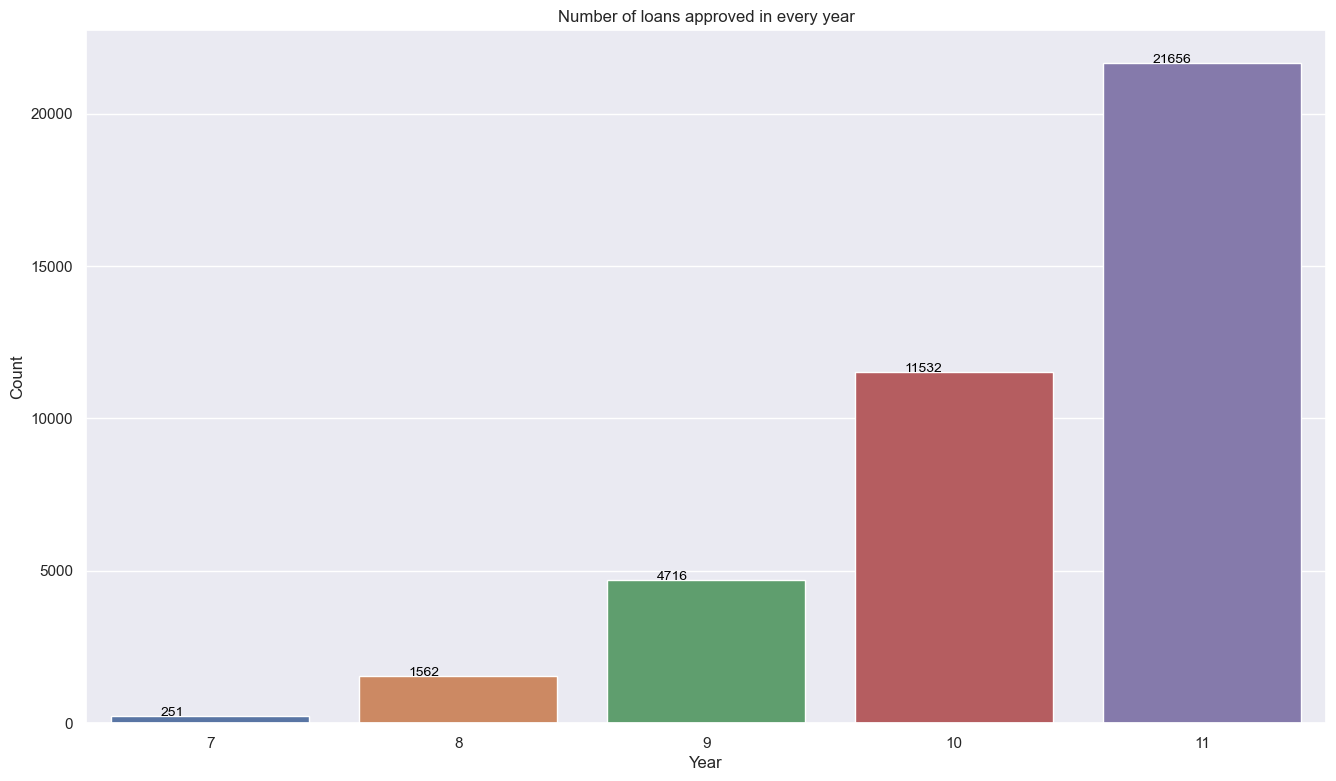

In [8]:
Updated_data['issue_year'] = Updated_data['issue_d'].apply(lambda X: int(X[-2:]) )
plt.figure(figsize=(16,9)) # figure ration 16:9
sns.set()
ax= sns.countplot(x=Updated_data['issue_year'], data=Updated_data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)
    

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of loans approved in every year")
plt.show()

### How much amount approved for loan

1. For this used issue_d column and funded amount
2. We seprateout years from issue_d cloumn and and groupby applied
3. Then ploted bar graph using funded amount

Count is incressing 

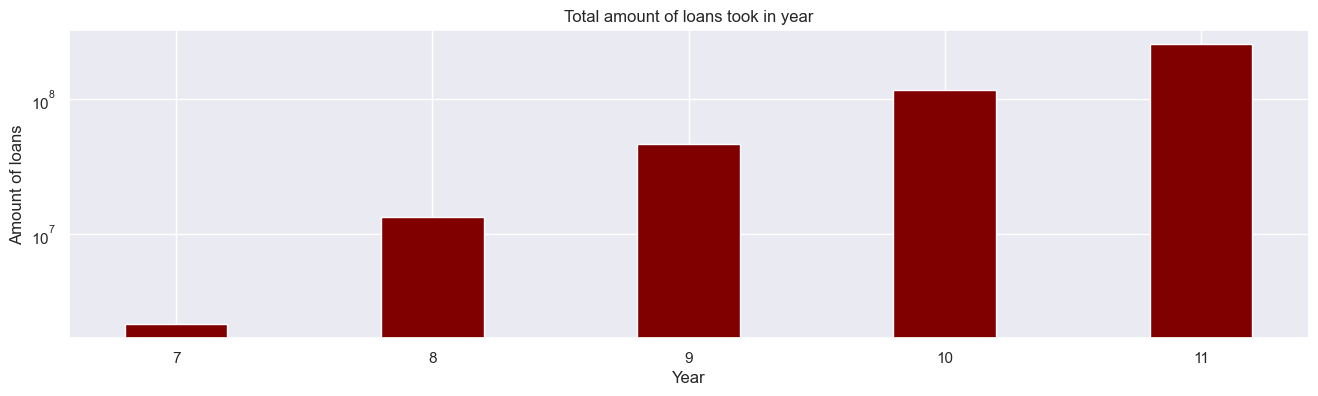

In [9]:
Updated_data = data.dropna(how='all', axis=1)
plt.figure(figsize=(16,4)) # figure ration 16:9
sns.set()
Updated_data['issue_year'] = Updated_data['issue_d'].apply(lambda X: int(X[-2:]) )
DF1 = Updated_data.groupby(by =['issue_year']).sum()
plt.bar(list(DF1.index), list(DF1.funded_amnt), color ='maroon',width = 0.4)

plt.yscale('log') 
plt.xlabel("Year")
plt.ylabel("Amount of loans")
plt.title("Total amount of loans took in year")
plt.show()

### Avarage interest rate 

1. For this used issue_d column and funded amount
2. We seprateout years from issue_d cloumn and and groupby applied
3. Then ploted bar graph using average of interest rate 

Count is incressing 

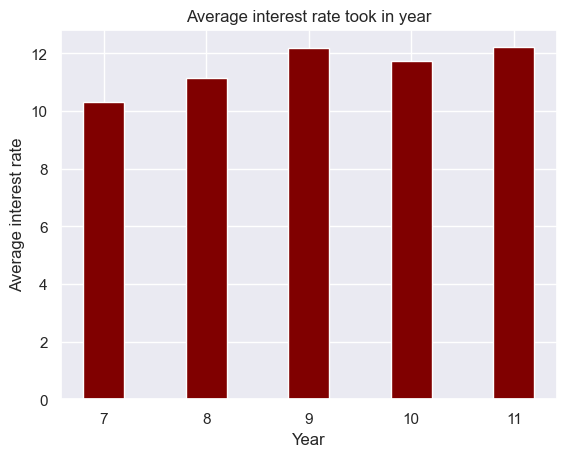

In [10]:
Updated_data = data.dropna(how='all', axis=1)
Updated_data['int_rate_updated'] = Updated_data['int_rate'].apply(lambda X: float(X.rstrip('%')))
Updated_data['issue_year'] = Updated_data['issue_d'].apply(lambda X: int(X[-2:]) )
DF1 = Updated_data.groupby(by =['issue_year']).mean()
plt.bar(list(DF1.index), list(DF1.int_rate_updated), color ='maroon',width = 0.4)

plt.xlabel("Year")
plt.ylabel("Average interest rate")
plt.title("Average interest rate took in year")
plt.show()

### What is diffrent plan for term 
### How many costumer are taking which plan



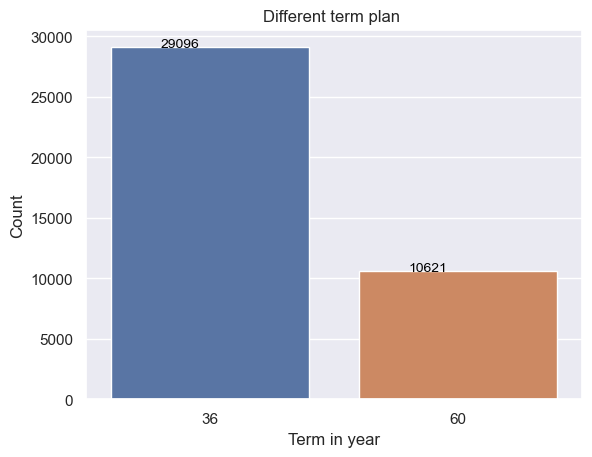

In [11]:

Updated_data['term_months'] = Updated_data['term'].apply(lambda X: int(X[1:3]) )
ax=sns.countplot(x=Updated_data['term_months'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)
    
plt.xlabel("Term in year")
plt.ylabel("Count")
plt.title("Different term plan ")
plt.show()

### Ploted histogram for below table to understand customer and bank

1. loan amount
2. funded amount
3. investment of funded amount



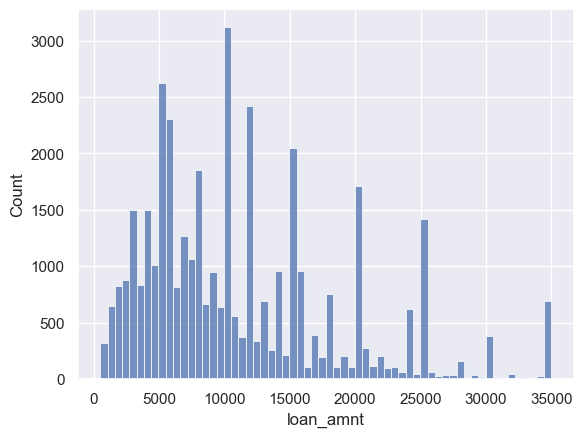

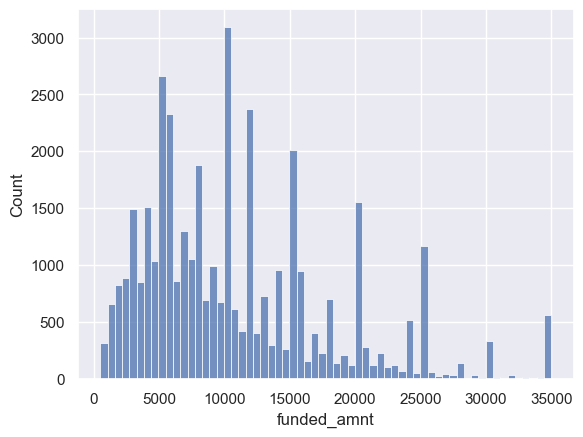

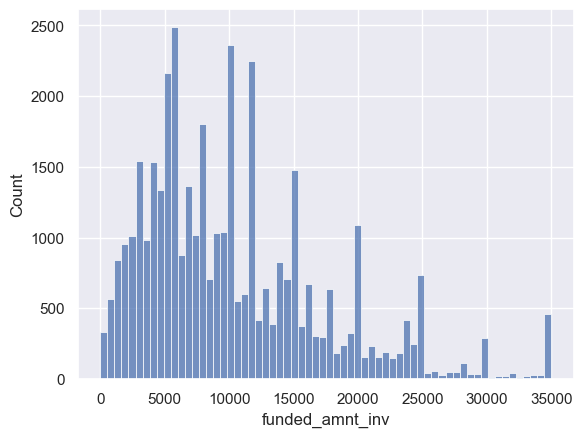

In [12]:
sns.histplot(data=Updated_data, x="loan_amnt")
plt.show()
sns.histplot(data=Updated_data, x="funded_amnt")
plt.show()
sns.histplot(data=Updated_data, x="funded_amnt_inv")
plt.show()

### ploted Grade categorization to understand which chatagary comes highest  
### as well as to seehow many customer in which categories belong


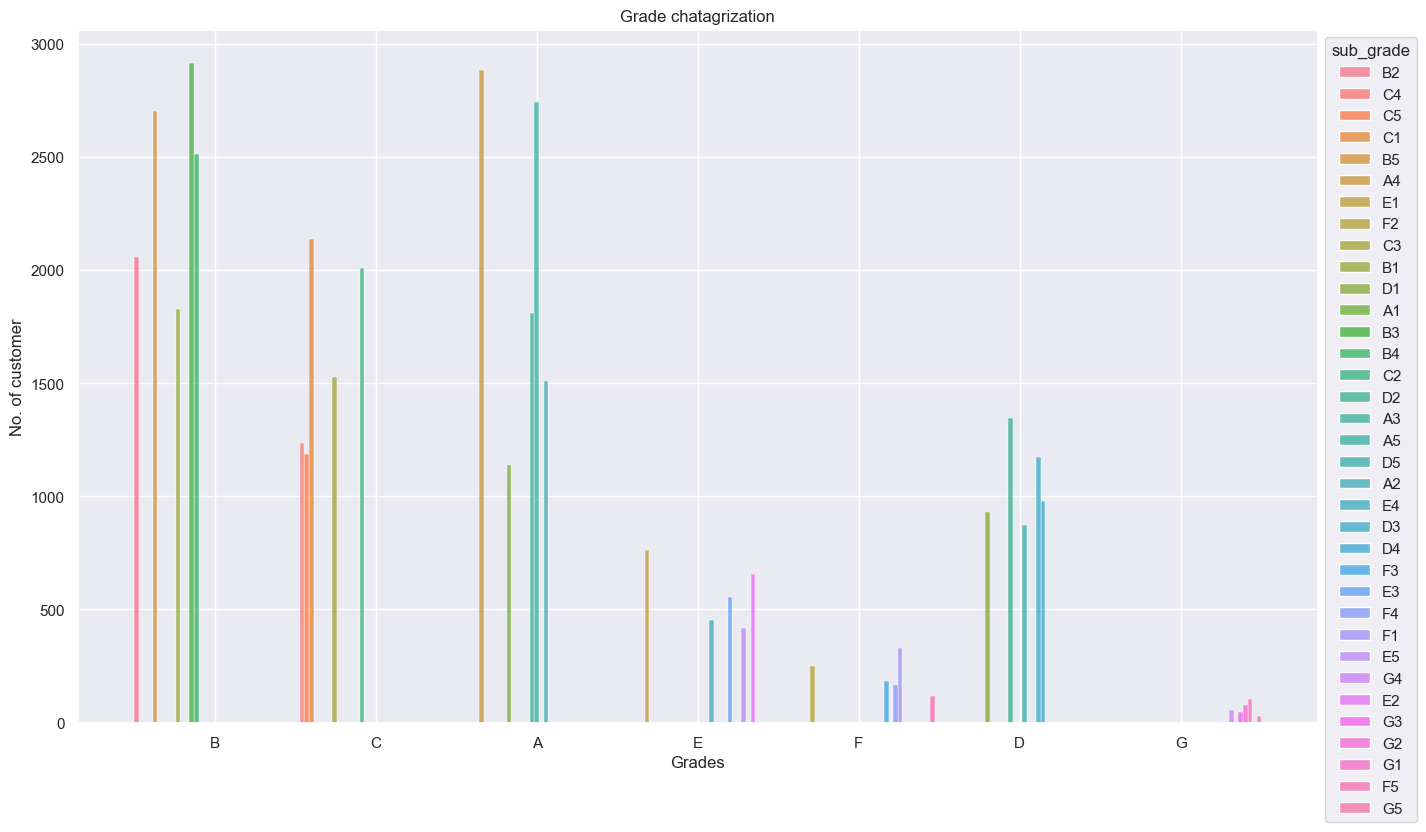

In [13]:
plt.figure(figsize=(16,9)) # figure ration 16:9
sns.set()

ax =sns.histplot(data=Updated_data, x="grade", hue="sub_grade", multiple="dodge",stat = 'count',)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Grades")
plt.ylabel("No. of customer")
plt.title("Grade chatagrization")
plt.show()

### identifing how many years customer is working 

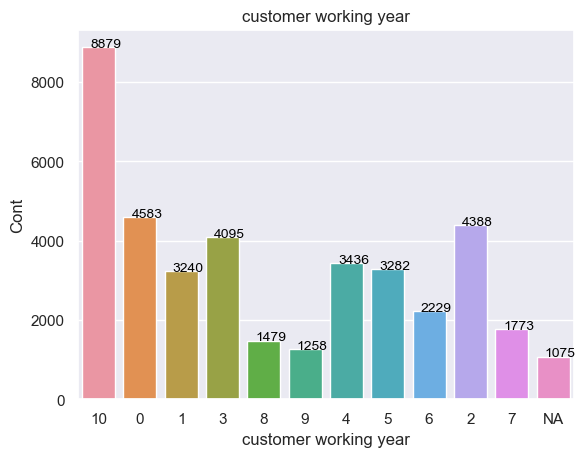

In [14]:
def year(x):
    val = x.emp_length
    if val == '< 1 year':
        return 0
    elif val == '10+ years':
        return 10
    elif val == '1 year':
        return 1
    elif val == 'n/a':
        return 'NA'
    else:
        try:
            return (int(val[:1]))
        except:
            return 'NA'
    

Updated_data['emp_length_updated'] = Updated_data.apply(year,axis = 1)
    
ax=sns.countplot(x=Updated_data['emp_length_updated'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)


plt.xlabel("customer working year")
plt.ylabel("Cont")
plt.title("customer working year")
plt.show()

### Cheking customer verification Status

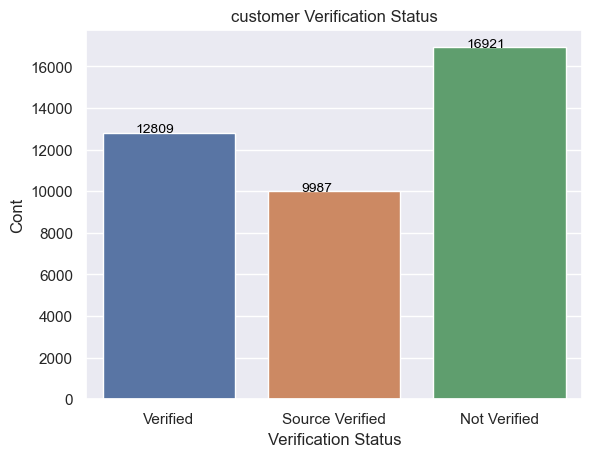

In [15]:
ax=sns.countplot(x=Updated_data['verification_status'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)


plt.xlabel("Verification Status")
plt.ylabel("Cont")
plt.title("customer Verification Status")
plt.show()

### Checcking customer Annual income V/S funded amount in scatter plot

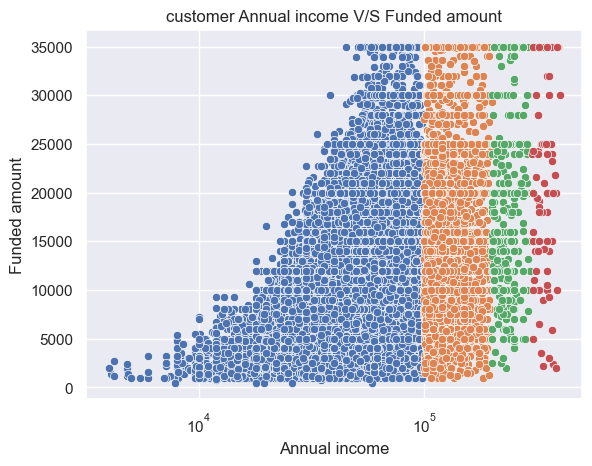

In [16]:
for a in range(0,400000,100000):
    data1 = Updated_data[(Updated_data['annual_inc']>a) & (Updated_data['annual_inc']<(a+100000)) ]
    sns.scatterplot(data=data1, x="annual_inc", y="funded_amnt")
    
plt.xscale('log')   
plt.xlabel("Annual income")
plt.ylabel("Funded amount")
plt.title("customer Annual income V/S Funded amount")
plt.show()

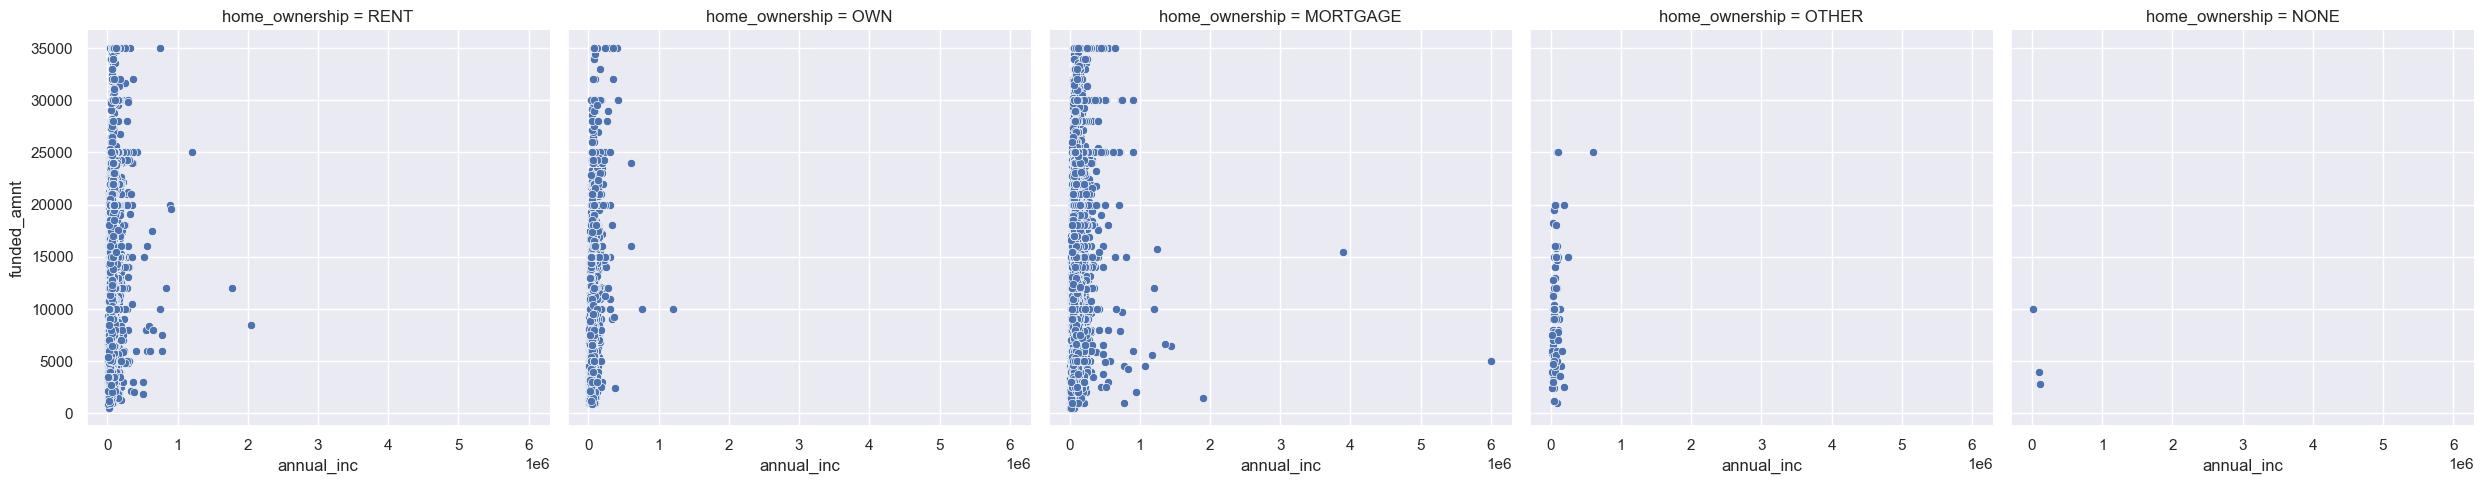

In [17]:
sns.relplot(
    data=Updated_data, x="annual_inc", y="funded_amnt",
    col="home_ownership",
    kind="scatter"
)

### Checking funded amount with respect to Home ownership

<AxesSubplot:xlabel='home_ownership', ylabel='funded_amnt'>

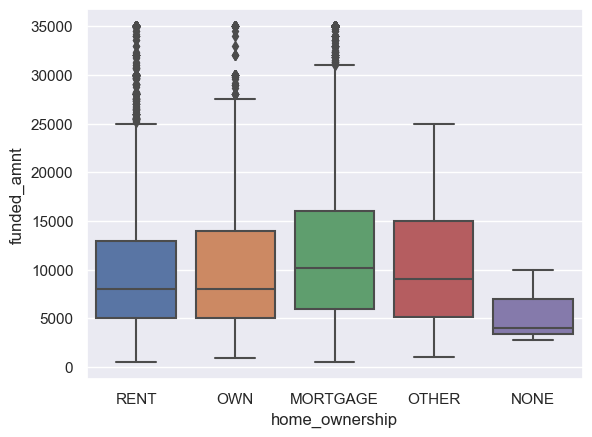

In [34]:
sns.boxplot(data=Updated_data, x="home_ownership", y="funded_amnt")

### last payments year

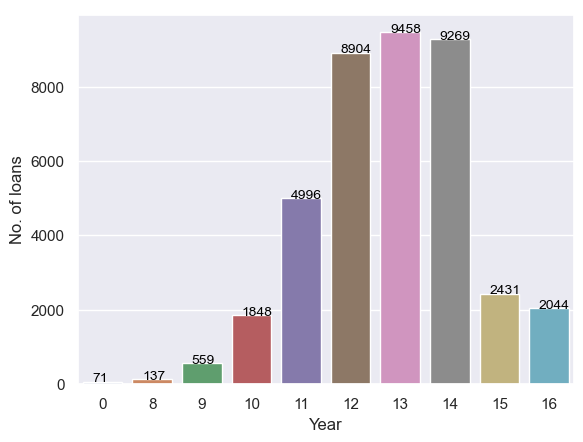

In [18]:
def year(x):
    val = x.last_pymnt_d
    try:
       return int(val[-2:]) 
    except:
       return 0


Updated_data['last_pymnt_amnt_updataed'] = Updated_data.apply(year,axis = 1)

ax=sns.countplot(x=Updated_data['last_pymnt_amnt_updataed'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)
    
plt.xlabel("Year")
plt.ylabel("No. of loans")
plt.title("")
plt.show()

### Number of derogatory public records count

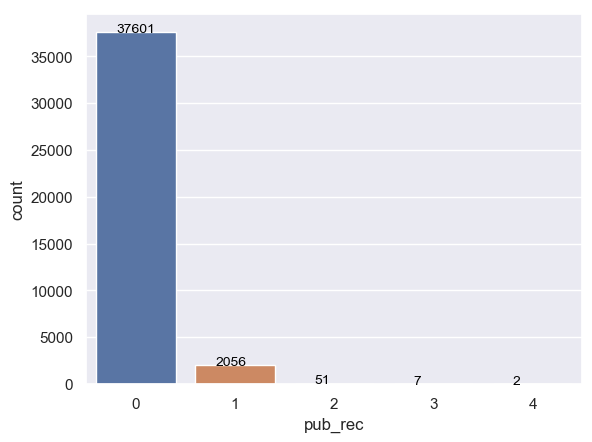

In [19]:
ax=sns.countplot(x=Updated_data['pub_rec'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)

### Checking purpose of loan while taking

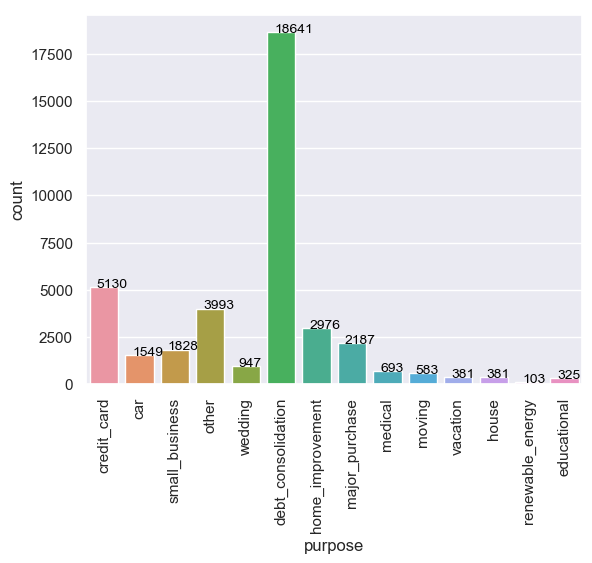

In [20]:
ax=sns.countplot(x=Updated_data['purpose'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)
    
plt.xticks( rotation =90)
plt.show()

### Loan status

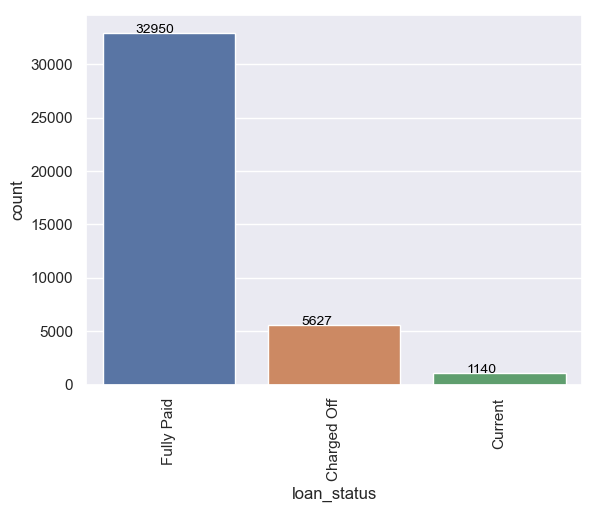

In [21]:
ax=sns.countplot(x=Updated_data['loan_status'], data=Updated_data);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10)
    
plt.xticks( rotation =90)
plt.show()